<a href="https://colab.research.google.com/github/derianr32/simulaciones-parcial-1/blob/main/Serie_de_Fourier_exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

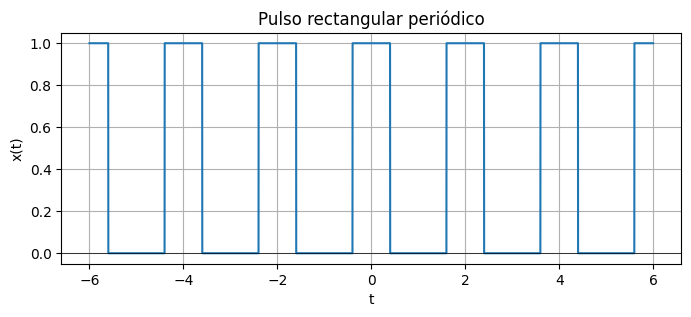

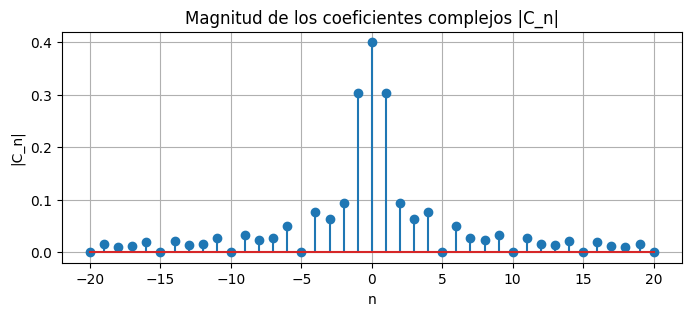

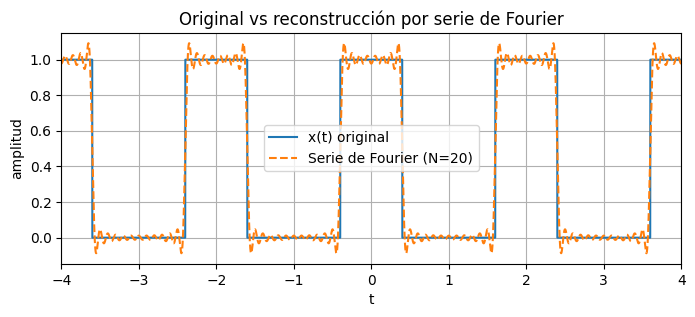

In [5]:
# ============================================
# Pulso rectangular periódico y su serie de Fourier

# ============================================

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Parámetros del pulso
# -----------------------------
A  = 1.0      # amplitud del pulso
T  = 2.0      # periodo de la señal periódica
d1 = 0.4      # semiancho del pulso (duración total 2*d1)

w0 = 2 * np.pi / T   # frecuencia angular fundamental

# -----------------------------
# 2. Construir el pulso periódico
# -----------------------------
Ts = 0.001                      # paso de muestreo en tiempo
t  = np.arange(-3*T, 3*T, Ts)   # eje temporal para varias réplicas

# Reducir t a un solo periodo en [-T/2, T/2)
t0 = (t + T/2) % T - T/2

# Definir el pulso: A entre -d1 y d1, 0 en otro caso
x = np.where(np.abs(t0) <= d1, A, 0.0)

plt.figure(figsize=(8,3))
plt.plot(t, x)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Pulso rectangular periódico')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.show()

# -----------------------------
# 3. Calcular coeficientes C_n
# -----------------------------
N = 20                      # número de armónicos a cada lado
n = np.arange(-N, N+1)      # índices n = -N,...,0,...,N

Cn = np.zeros_like(n, dtype=complex)
for i, k in enumerate(n):
    if k == 0:
        # Coeficiente medio C0
        Cn[i] = 2 * A * d1 / T
    else:
        # Cn = (A/(pi n)) * sin(2 pi n d1 / T)
        Cn[i] = (A / (np.pi * k)) * np.sin(2 * np.pi * k * d1 / T)

# -----------------------------
# 4. Espectro de magnitud |C_n|
# -----------------------------
plt.figure(figsize=(8,3))
plt.stem(n, np.abs(Cn))   # <- sin use_line_collection
plt.title('Magnitud de los coeficientes complejos |C_n|')
plt.xlabel('n')
plt.ylabel('|C_n|')
plt.grid(True)
plt.show()


# -----------------------------
# 5. Reconstrucción con la serie
# -----------------------------
x_rec = np.zeros_like(t, dtype=complex)
for i, k in enumerate(n):
    x_rec += Cn[i] * np.exp(1j * k * w0 * t)

plt.figure(figsize=(8,3))
plt.plot(t, x.real, label='x(t) original')
plt.plot(t, x_rec.real, '--', label=f'Serie de Fourier (N={N})')
plt.xlim(-2*T, 2*T)
plt.xlabel('t')
plt.ylabel('amplitud')
plt.title('Original vs reconstrucción por serie de Fourier')
plt.grid(True)
plt.legend()
plt.show()
